# 주제 설명

이 프로젝트는 국내 시구신고 평균소득월액과 기대수명지표를 바탕으로 지역별 평균 소득과 기대수명 간의 상관관계를 분석하는 것이 목표입니다. 이를 바탕으로 지도를 사용한 시각화를 통해 지역 간 격차를 직관적으로 파악할 수 있게 하며, 지역별 정
책적 개입 필요성 및 방향성을 도출하는 것을 목적으로 합니다.


# 데이터 수집 방법

공공데이터포털에서 국민연금공단*자격 시구신고 평균소득월액과 국민건강보험공단*지역별 기대수명지표를 csv형식으로 받아서 사용했습니다.

평균소득월액(https://www.data.go.kr/data/3046077/fileData.do)

기대수명지표(https://www.data.go.kr/data/15039778/fileData.do)


# 데이터 설명


In [355]:
import pandas as pd

In [356]:
average_income = pd.read_csv('data/average_income.csv', encoding='cp949')
average_income.head()

,기준년월,시군구,평균소득월액
0,2020-12,서울특별시종로구,1478370
1,2020-12,서울특별시중구,1477152
2,2020-12,서울특별시용산구,1561618
3,2020-12,서울특별시성동구,1501888
4,2020-12,서울특별시광진구,1392985


average_income.csv는 평균소득월액 관련 데이터입니다. 기준년월, 시군구, 평균소득월액으로 나뉘어져 있습니다.

기준년월은 해당 평균소득월액을 조사한 연도 및 월을 의미합니다. 시군구는 해당 평균소득월액을 조사한 지역을 의미합니다. 평균소득월액은 조사 기간 동안 조사 지역에서 1인이 평균적으로 얻은 소득을 의미합니다.


In [357]:
life_expectancy = pd.read_csv('data/life_expectancy.csv', encoding='cp949')
life_expectancy.head()

,지표연도,적용기간,성별,시도,시군구,평균 기대수명,보험료1분위,보험료2분위,보험료3분위,보험료4분위,보험료5분위,기대수명격차
0,2021,1년,남성,전국,전체,81.55,75.85,82.00,82.71,83.63,84.71,8.86
1,2021,1년,여성,전국,전체,87.66,83.88,87.44,88.29,89.13,90.60,6.73
2,2021,1년,전체,전국,전체,84.77,79.77,84.86,85.70,86.68,87.93,8.16
3,2021,4년,남성,서울특별시,전체,82.71,77.88,82.81,83.26,84.74,85.78,7.91
4,2021,4년,여성,서울특별시,전체,88.53,85.70,88.07,88.61,89.55,91.68,5.98


우선 기준연도를 정해 기준년월의 연도와 지표연도의 연도를 맞추어 줘야 합니다, 이후, 시군구를 같은 형태로 맞추어 주어야 비교가 가능하기에 해당 작업을 실행해 주어야 합니다. 이를 위해 결측치 확인 후 기준연도의 데이터만 빼내는 데이터 조작을 시행하겠습니다.


# 결측치 확인


In [358]:
print(average_income.isnull().sum())

기준년월      0
시군구       0
평균소득월액    0
dtype: int64


In [359]:
print(life_expectancy.isnull().sum())

지표연도       0
적용기간       0
성별         0
시도         0
시군구        0
평균 기대수명    0
보험료1분위     0
보험료2분위     0
보험료3분위     0
보험료4분위     0
보험료5분위     0
기대수명격차     0
dtype: int64


# 데이터 조작


In [360]:
average_income

,기준년월,시군구,평균소득월액
0,2020-12,서울특별시종로구,1478370
1,2020-12,서울특별시중구,1477152
2,2020-12,서울특별시용산구,1561618
3,2020-12,서울특별시성동구,1501888
4,2020-12,서울특별시광진구,1392985
...,...,...,...
1145,2024-12,경상남도함양군,1361140
1146,2024-12,경상남도거창군,1379363
1147,2024-12,경상남도합천군,1366202
1148,2024-12,제주특별자치도제주시,1407793


In [361]:
average_income = average_income[average_income['기준년월'] == '2021-12']

In [362]:
average_income

,기준년월,시군구,평균소득월액
230,2021-12,서울특별시종로구,1495060
231,2021-12,서울특별시중구,1510626
232,2021-12,서울특별시용산구,1566339
233,2021-12,서울특별시성동구,1523531
234,2021-12,서울특별시광진구,1408562
...,...,...,...
455,2021-12,경상남도함양군,1265493
456,2021-12,경상남도거창군,1301606
457,2021-12,경상남도합천군,1287646
458,2021-12,제주특별자치도제주시,1368049


기대수명 지표가 2021년 기준이기 때문에 평균소득 수준 지표도 2021년으로 맞춰주었습니다. 그래서 기준연도 컬럼이 필요 없기 때문에 제거해주도록 하겠습니다.


In [363]:
average_income = average_income.drop('기준년월', axis=1)
average_income

,시군구,평균소득월액
230,서울특별시종로구,1495060
231,서울특별시중구,1510626
232,서울특별시용산구,1566339
233,서울특별시성동구,1523531
234,서울특별시광진구,1408562
...,...,...
455,경상남도함양군,1265493
456,경상남도거창군,1301606
457,경상남도합천군,1287646
458,제주특별자치도제주시,1368049


In [364]:
life_expectancy = life_expectancy.drop('지표연도', axis=1)
life_expectancy

,적용기간,성별,시도,시군구,평균 기대수명,보험료1분위,보험료2분위,보험료3분위,보험료4분위,보험료5분위,기대수명격차
0,1년,남성,전국,전체,81.55,75.85,82.00,82.71,83.63,84.71,8.86
1,1년,여성,전국,전체,87.66,83.88,87.44,88.29,89.13,90.60,6.73
2,1년,전체,전국,전체,84.77,79.77,84.86,85.70,86.68,87.93,8.16
3,4년,남성,서울특별시,전체,82.71,77.88,82.81,83.26,84.74,85.78,7.91
4,4년,여성,서울특별시,전체,88.53,85.70,88.07,88.61,89.55,91.68,5.98
...,...,...,...,...,...,...,...,...,...,...,...
811,6년,여성,제주특별자치도,제주시,87.74,83.80,87.85,88.92,88.55,90.36,6.56
812,6년,전체,제주특별자치도,제주시,84.42,79.01,84.89,85.41,86.36,87.55,8.54
813,6년,남성,제주특별자치도,서귀포시,80.43,74.00,80.52,82.45,82.96,84.06,10.06
814,6년,여성,제주특별자치도,서귀포시,88.34,84.23,87.65,89.26,90.26,91.47,7.24


기대수명 지표의 경우 지역의 범위가 전국 단위인지 도, 특별시 단위인지 시군구 단위인지에 따라 다른 적용기간 및 결과를 가지고 있습니다. 평균소득 수준 지표의 경우 시군구 단위로 데이터를 제공하고 있기 때문에, 기대수명 지표에서 적용기간이 6년인 데이터만 추출하여 기준을 맞추어주겠습니다. 그리고 성별 구분 또한 전체로 맞추어 주겠습니다.


In [365]:
life_expectancy = life_expectancy[life_expectancy['적용기간'] == '6년']
life_expectancy = life_expectancy[life_expectancy['성별'] == '전체']
life_expectancy

,적용기간,성별,시도,시군구,평균 기대수명,보험료1분위,보험료2분위,보험료3분위,보험료4분위,보험료5분위,기대수명격차
8,6년,전체,서울특별시,종로구,85.85,81.07,86.05,86.26,87.05,90.14,9.07
11,6년,전체,서울특별시,중구,85.80,81.22,85.27,86.72,86.89,90.10,8.88
14,6년,전체,서울특별시,용산구,86.21,81.24,85.98,88.04,87.79,88.91,7.67
17,6년,전체,서울특별시,성동구,85.63,82.26,85.83,85.98,86.43,88.00,5.74
20,6년,전체,서울특별시,광진구,85.75,82.48,84.97,85.92,88.30,88.55,6.08
...,...,...,...,...,...,...,...,...,...,...,...
800,6년,전체,경상남도,함양군,83.20,78.52,82.74,85.42,84.72,86.22,7.70
803,6년,전체,경상남도,거창군,83.53,78.00,83.47,85.25,85.08,87.20,9.20
806,6년,전체,경상남도,합천군,82.56,77.51,82.64,83.25,84.83,85.75,8.23
812,6년,전체,제주특별자치도,제주시,84.42,79.01,84.89,85.41,86.36,87.55,8.54


이제 두 지표의 지역 컬럼을 맞추어주도록 하겠습니다.


In [366]:
life_expectancy['시군구'] = life_expectancy['시도'] + life_expectancy['시군구']

life_expectancy = life_expectancy.drop('시도', axis=1).drop('적용기간', axis=1).drop('성별', axis=1)

print(life_expectancy.head())
print(f"\n컬럼명: {list(life_expectancy.columns)}")


         시군구  평균 기대수명  보험료1분위  보험료2분위  보험료3분위  보험료4분위  보험료5분위  기대수명격차
8   서울특별시종로구    85.85   81.07   86.05   86.26   87.05   90.14    9.07
11   서울특별시중구    85.80   81.22   85.27   86.72   86.89   90.10    8.88
14  서울특별시용산구    86.21   81.24   85.98   88.04   87.79   88.91    7.67
17  서울특별시성동구    85.63   82.26   85.83   85.98   86.43   88.00    5.74
20  서울특별시광진구    85.75   82.48   84.97   85.92   88.30   88.55    6.08

컬럼명: ['시군구', '평균 기대수명', '보험료1분위', '보험료2분위', '보험료3분위', '보험료4분위', '보험료5분위', '기대수명격차']


In [367]:
print("기대수명 지표 지역 컬럼")
print(life_expectancy['시군구'].unique())
print(f"\n총 {len(life_expectancy['시군구'].unique())}개")


기대수명 지표 지역 컬럼
['서울특별시종로구' '서울특별시중구' '서울특별시용산구' '서울특별시성동구' '서울특별시광진구' '서울특별시동대문구'
 '서울특별시중랑구' '서울특별시성북구' '서울특별시강북구' '서울특별시도봉구' '서울특별시노원구' '서울특별시은평구'
 '서울특별시서대문구' '서울특별시마포구' '서울특별시양천구' '서울특별시강서구' '서울특별시구로구' '서울특별시금천구'
 '서울특별시영등포구' '서울특별시동작구' '서울특별시관악구' '서울특별시서초구' '서울특별시강남구' '서울특별시송파구'
 '서울특별시강동구' '부산광역시중구' '부산광역시서구' '부산광역시동구' '부산광역시영도구' '부산광역시부산진구'
 '부산광역시동래구' '부산광역시남구' '부산광역시북구' '부산광역시해운대구' '부산광역시사하구' '부산광역시금정구'
 '부산광역시강서구' '부산광역시연제구' '부산광역시수영구' '부산광역시사상구' '부산광역시기장군' '대구광역시중구'
 '대구광역시동구' '대구광역시서구' '대구광역시남구' '대구광역시북구' '대구광역시수성구' '대구광역시달서구' '대구광역시달성군'
 '인천광역시중구' '인천광역시동구' '인천광역시남구' '인천광역시미추홀구' '인천광역시연수구' '인천광역시남동구'
 '인천광역시부평구' '인천광역시계양구' '인천광역시서구' '인천광역시강화군' '인천광역시옹진군' '광주광역시동구' '광주광역시서구'
 '광주광역시남구' '광주광역시북구' '광주광역시광산구' '대전광역시동구' '대전광역시중구' '대전광역시서구' '대전광역시유성구'
 '대전광역시대덕구' '울산광역시중구' '울산광역시남구' '울산광역시동구' '울산광역시북구' '울산광역시울주군'
 '세종특별자치시세종시' '경기도수원시 장안구' '경기도수원시 권선구' '경기도수원시 팔달구' '경기도수원시 영통구'
 '경기도성남시 수정구' '경기도성남시 중원구' '경기도성남시 분당구' '경기도의정부시' '경기도안양시 만안구'
 '경기도안양시 동안구' '경기도부천시' '경기도부천시 원미구' '경기도

In [368]:
print("평균소득 수준 지표 지역 컬럼")
print(average_income['시군구'].unique())
print(f"\n총 {len(average_income['시군구'].unique())}개")

평균소득 수준 지표 지역 컬럼
['서울특별시종로구' '서울특별시중구' '서울특별시용산구' '서울특별시성동구' '서울특별시광진구' '서울특별시동대문구'
 '서울특별시중랑구' '서울특별시성북구' '서울특별시강북구' '서울특별시도봉구' '서울특별시노원구' '서울특별시은평구'
 '서울특별시서대문구' '서울특별시마포구' '서울특별시양천구' '서울특별시강서구' '서울특별시구로구' '서울특별시금천구'
 '서울특별시영등포구' '서울특별시동작구' '서울특별시관악구' '서울특별시서초구' '서울특별시강남구' '서울특별시송파구'
 '서울특별시강동구' '부산광역시중구' '부산광역시서구' '부산광역시동구' '부산광역시영도구' '부산광역시부산진구'
 '부산광역시동래구' '부산광역시남구' '부산광역시북구' '부산광역시해운대구' '부산광역시사하구' '부산광역시금정구'
 '부산광역시강서구' '부산광역시연제구' '부산광역시수영구' '부산광역시사상구' '부산광역시기장군' '대구광역시중구'
 '대구광역시동구' '대구광역시서구' '대구광역시남구' '대구광역시북구' '대구광역시수성구' '대구광역시달서구' '대구광역시달성군'
 '대구광역시군위군' '인천광역시중구' '인천광역시동구' '인천광역시남구' '인천광역시미추홀구' '인천광역시연수구'
 '인천광역시남동구' '인천광역시부평구' '인천광역시계양구' '인천광역시서구' '인천광역시강화군' '인천광역시옹진군'
 '광주광역시동구' '광주광역시서구' '광주광역시남구' '광주광역시북구' '광주광역시광산구' '대전광역시동구' '대전광역시중구'
 '대전광역시서구' '대전광역시유성구' '대전광역시대덕구' '울산광역시중구' '울산광역시남구' '울산광역시동구' '울산광역시북구'
 '울산광역시울주군' '세종특별자치시' '경기도수원시' '경기도성남시' '경기도의정부시' '경기도안양시' '경기도부천시'
 '경기도광명시' '경기도평택시' '경기도동두천시' '경기도안산시' '경기도고양시' '경기도과천시' '경기도구리시' '경기도남양주시'
 '경기도오산시' '경기도시흥시' '경기도

두 컬럼 수를 비교해보면, 254개 vs 230개로 개수가 다른 것을 알 수 있습니다. 우선 어떤 이유로 개수가 차이가 나는지 알아보도록 하겠습니다.


In [369]:
print("시군구 개수 비교")
print(f"life_expectancy 시군구 개수: {len(life_expectancy['시군구'].unique())}")
print(f"average_income 시군구 개수: {len(average_income['시군구'].unique())}")

시군구 개수 비교
life_expectancy 시군구 개수: 254
average_income 시군구 개수: 230


In [370]:
life_exp_sigungu = set(life_expectancy['시군구'].unique())
avg_income_sigungu = set(average_income['시군구'].unique())

In [371]:
print(f"\n차이점 분석")
print(f"life_expectancy에만 있는 시군구: {len(life_exp_sigungu - avg_income_sigungu)}개")
print("life_expectancy에만 있는 시군구들:")
life_only = sorted(list(life_exp_sigungu - avg_income_sigungu))
for i, sigungu in enumerate(life_only):
    print(f"  {i+1}. {sigungu}")


차이점 분석
life_expectancy에만 있는 시군구: 68개
life_expectancy에만 있는 시군구들:
  1. 강원도강릉시
  2. 강원도고성군
  3. 강원도동해시
  4. 강원도삼척시
  5. 강원도속초시
  6. 강원도양구군
  7. 강원도양양군
  8. 강원도영월군
  9. 강원도원주시
  10. 강원도인제군
  11. 강원도정선군
  12. 강원도철원군
  13. 강원도춘천시
  14. 강원도태백시
  15. 강원도평창군
  16. 강원도홍천군
  17. 강원도화천군
  18. 강원도횡성군
  19. 경기도고양시 덕양구
  20. 경기도고양시 일산동구
  21. 경기도고양시 일산서구
  22. 경기도부천시 소사구
  23. 경기도부천시 오정구
  24. 경기도부천시 원미구
  25. 경기도성남시 분당구
  26. 경기도성남시 수정구
  27. 경기도성남시 중원구
  28. 경기도수원시 권선구
  29. 경기도수원시 영통구
  30. 경기도수원시 장안구
  31. 경기도수원시 팔달구
  32. 경기도안산시 단원구
  33. 경기도안산시 상록구
  34. 경기도안양시 동안구
  35. 경기도안양시 만안구
  36. 경기도용인시 기흥구
  37. 경기도용인시 수지구
  38. 경기도용인시 처인구
  39. 경상남도창원시 마산합포구
  40. 경상남도창원시 마산회원구
  41. 경상남도창원시 성산구
  42. 경상남도창원시 의창구
  43. 경상남도창원시 진해구
  44. 경상북도군위군
  45. 경상북도포항시 남구
  46. 경상북도포항시 북구
  47. 세종특별자치시세종시
  48. 전라북도고창군
  49. 전라북도군산시
  50. 전라북도김제시
  51. 전라북도남원시
  52. 전라북도무주군
  53. 전라북도부안군
  54. 전라북도순창군
  55. 전라북도완주군
  56. 전라북도익산시
  57. 전라북도임실군
  58. 전라북도장수군
  59. 전라북도전주시 덕진구
  60. 전라북도전주시 완산구
  61. 전라북도정읍시
  62.

In [372]:
print(f"\naverage_income에만 있는 시군구: {len(avg_income_sigungu - life_exp_sigungu)}개")
print("average_income에만 있는 시군구들:")
avg_only = sorted(list(avg_income_sigungu - life_exp_sigungu))
for i, sigungu in enumerate(avg_only):
    print(f"  {i+1}. {sigungu}")



average_income에만 있는 시군구: 44개
average_income에만 있는 시군구들:
  1. 강원특별자치도강릉시
  2. 강원특별자치도고성군
  3. 강원특별자치도동해시
  4. 강원특별자치도삼척시
  5. 강원특별자치도속초시
  6. 강원특별자치도양구군
  7. 강원특별자치도양양군
  8. 강원특별자치도영월군
  9. 강원특별자치도원주시
  10. 강원특별자치도인제군
  11. 강원특별자치도정선군
  12. 강원특별자치도철원군
  13. 강원특별자치도춘천시
  14. 강원특별자치도태백시
  15. 강원특별자치도평창군
  16. 강원특별자치도홍천군
  17. 강원특별자치도화천군
  18. 강원특별자치도횡성군
  19. 경기도고양시
  20. 경기도성남시
  21. 경기도수원시
  22. 경기도안산시
  23. 경기도안양시
  24. 경기도용인시
  25. 경상남도창원시
  26. 경상북도포항시
  27. 대구광역시군위군
  28. 세종특별자치시
  29. 전북특별자치도고창군
  30. 전북특별자치도군산시
  31. 전북특별자치도김제시
  32. 전북특별자치도남원시
  33. 전북특별자치도무주군
  34. 전북특별자치도부안군
  35. 전북특별자치도순창군
  36. 전북특별자치도완주군
  37. 전북특별자치도익산시
  38. 전북특별자치도임실군
  39. 전북특별자치도장수군
  40. 전북특별자치도전주시
  41. 전북특별자치도정읍시
  42. 전북특별자치도진안군
  43. 충청남도천안시
  44. 충청북도청주시


In [373]:
print(f"\n공통으로 있는 시군구: {len(life_exp_sigungu & avg_income_sigungu)}개")


공통으로 있는 시군구: 186개


우선 강원도가 강원도로 표시되는지 강원특별자치도로 표시되는지 차이가 있는 것 같습니다. 전라북도도 동일한 문제가 있는 것 같습니다. 이를 획일화 시킨 뒤에 다시 확인해보도록 하겠습니다.


In [374]:
life_expectancy['시군구'] = life_expectancy['시군구'].str.replace('^강원도', '강원특별자치도', regex=True)
life_expectancy['시군구'] = life_expectancy['시군구'].str.replace('^전라북도', '전북특별자치도', regex=True)


In [375]:
life_exp_sigungu = set(life_expectancy['시군구'].unique())

print(f"\n차이점 분석")
print(f"life_expectancy에만 있는 시군구: {len(life_exp_sigungu - avg_income_sigungu)}개")
print("life_expectancy에만 있는 시군구들:")
life_only = sorted(list(life_exp_sigungu - avg_income_sigungu))
for i, sigungu in enumerate(life_only):
    print(f"  {i+1}. {sigungu}")


차이점 분석
life_expectancy에만 있는 시군구: 37개
life_expectancy에만 있는 시군구들:
  1. 경기도고양시 덕양구
  2. 경기도고양시 일산동구
  3. 경기도고양시 일산서구
  4. 경기도부천시 소사구
  5. 경기도부천시 오정구
  6. 경기도부천시 원미구
  7. 경기도성남시 분당구
  8. 경기도성남시 수정구
  9. 경기도성남시 중원구
  10. 경기도수원시 권선구
  11. 경기도수원시 영통구
  12. 경기도수원시 장안구
  13. 경기도수원시 팔달구
  14. 경기도안산시 단원구
  15. 경기도안산시 상록구
  16. 경기도안양시 동안구
  17. 경기도안양시 만안구
  18. 경기도용인시 기흥구
  19. 경기도용인시 수지구
  20. 경기도용인시 처인구
  21. 경상남도창원시 마산합포구
  22. 경상남도창원시 마산회원구
  23. 경상남도창원시 성산구
  24. 경상남도창원시 의창구
  25. 경상남도창원시 진해구
  26. 경상북도군위군
  27. 경상북도포항시 남구
  28. 경상북도포항시 북구
  29. 세종특별자치시세종시
  30. 전북특별자치도전주시 덕진구
  31. 전북특별자치도전주시 완산구
  32. 충청남도천안시 동남구
  33. 충청남도천안시 서북구
  34. 충청북도청주시 상당구
  35. 충청북도청주시 서원구
  36. 충청북도청주시 청원구
  37. 충청북도청주시 흥덕구


In [376]:
avg_income_sigungu = set(average_income['시군구'].unique())

print(f"\naverage_income에만 있는 시군구: {len(avg_income_sigungu - life_exp_sigungu)}개")
print("average_income에만 있는 시군구들:")
avg_only = sorted(list(avg_income_sigungu - life_exp_sigungu))
for i, sigungu in enumerate(avg_only):
    print(f"  {i+1}. {sigungu}")



average_income에만 있는 시군구: 13개
average_income에만 있는 시군구들:
  1. 경기도고양시
  2. 경기도성남시
  3. 경기도수원시
  4. 경기도안산시
  5. 경기도안양시
  6. 경기도용인시
  7. 경상남도창원시
  8. 경상북도포항시
  9. 대구광역시군위군
  10. 세종특별자치시
  11. 전북특별자치도전주시
  12. 충청남도천안시
  13. 충청북도청주시


남은 데이터들을 확인해보면 시 단위인지 군구 단위인지에 따라서 컬럼 개수가 달라지는 것을 알 수 있습니다. 이 문제를 해결하기위해 군구 단위를 시 단위로 만들어 주겠습니다.


In [377]:
import numpy as np

avg_si_gun_gu = set(average_income['시군구'].unique())
life_si_gun_gu = set(life_expectancy['시군구'].unique())
only_in_avg = avg_si_gun_gu - life_si_gun_gu

print(f"average_income에만 있는 시군구: {len(only_in_avg)}개")
print("처리할 시군구들:")
for sigungu in sorted(only_in_avg):
    print(f"  - {sigungu}")

processed_count = 0
for si_gun_gu in only_in_avg:
    matched_cols = [col for col in life_expectancy['시군구'] if col.startswith(si_gun_gu)]
    if matched_cols:
        print(f"\n처리 중: {si_gun_gu}")
        print(f"  매칭된 시군구들: {matched_cols}")
        
        matched_data = life_expectancy[life_expectancy['시군구'].isin(matched_cols)]
        
        numeric_cols = matched_data.select_dtypes(include=[np.number]).columns
        avg_values = matched_data[numeric_cols].mean()
        
        new_row = {'시군구': si_gun_gu}
        for col in numeric_cols:
            new_row[col] = avg_values[col]
        
        new_row_df = pd.DataFrame([new_row])
        life_expectancy = pd.concat([life_expectancy, new_row_df], ignore_index=True)
        
        life_expectancy = life_expectancy[~life_expectancy['시군구'].isin(matched_cols)]
        
        processed_count += 1
        print(f"  완료: {si_gun_gu} (평균 처리됨)")

print(f"\n총 {processed_count}개 시군구가 평균 처리")
print(f"처리 후 life_expectancy 시군구 개수: {len(life_expectancy['시군구'].unique())}개")

average_income에만 있는 시군구: 13개
처리할 시군구들:
  - 경기도고양시
  - 경기도성남시
  - 경기도수원시
  - 경기도안산시
  - 경기도안양시
  - 경기도용인시
  - 경상남도창원시
  - 경상북도포항시
  - 대구광역시군위군
  - 세종특별자치시
  - 전북특별자치도전주시
  - 충청남도천안시
  - 충청북도청주시

처리 중: 경기도수원시
  매칭된 시군구들: ['경기도수원시 장안구', '경기도수원시 권선구', '경기도수원시 팔달구', '경기도수원시 영통구']
  완료: 경기도수원시 (평균 처리됨)

처리 중: 경기도안산시
  매칭된 시군구들: ['경기도안산시 상록구', '경기도안산시 단원구']
  완료: 경기도안산시 (평균 처리됨)

처리 중: 충청북도청주시
  매칭된 시군구들: ['충청북도청주시 상당구', '충청북도청주시 서원구', '충청북도청주시 흥덕구', '충청북도청주시 청원구']
  완료: 충청북도청주시 (평균 처리됨)

처리 중: 경기도성남시
  매칭된 시군구들: ['경기도성남시 수정구', '경기도성남시 중원구', '경기도성남시 분당구']
  완료: 경기도성남시 (평균 처리됨)

처리 중: 세종특별자치시
  매칭된 시군구들: ['세종특별자치시세종시']
  완료: 세종특별자치시 (평균 처리됨)

처리 중: 전북특별자치도전주시
  매칭된 시군구들: ['전북특별자치도전주시 완산구', '전북특별자치도전주시 덕진구']
  완료: 전북특별자치도전주시 (평균 처리됨)

처리 중: 충청남도천안시
  매칭된 시군구들: ['충청남도천안시 동남구', '충청남도천안시 서북구']
  완료: 충청남도천안시 (평균 처리됨)

처리 중: 경기도용인시
  매칭된 시군구들: ['경기도용인시 처인구', '경기도용인시 기흥구', '경기도용인시 수지구']
  완료: 경기도용인시 (평균 처리됨)

처리 중: 경기도고양시
  매칭된 시군구들: ['경기도고양시 덕양구', '경기도고양시 일산동구', '경기도고양시 일산서구']
  완료: 경기도고양시 (평균 처리됨)


In [378]:
print(f"\n공통으로 있는 시군구: {len(life_exp_sigungu & avg_income_sigungu)}개")


공통으로 있는 시군구: 217개


In [379]:
life_exp_sigungu = set(life_expectancy['시군구'].unique())
avg_income_sigungu = set(average_income['시군구'].unique())

print(f"\n차이점 분석")
print(f"life_expectancy에만 있는 시군구: {len(life_exp_sigungu - avg_income_sigungu)}개")
print("life_expectancy에만 있는 시군구들:")
life_only = sorted(list(life_exp_sigungu - avg_income_sigungu))
for i, sigungu in enumerate(life_only):
    print(f"  {i+1}. {sigungu}")



print(f"\naverage_income에만 있는 시군구: {len(avg_income_sigungu - life_exp_sigungu)}개")
print("average_income에만 있는 시군구들:")
avg_only = sorted(list(avg_income_sigungu - life_exp_sigungu))
for i, sigungu in enumerate(avg_only):
    print(f"  {i+1}. {sigungu}")



차이점 분석
life_expectancy에만 있는 시군구: 4개
life_expectancy에만 있는 시군구들:
  1. 경기도부천시 소사구
  2. 경기도부천시 오정구
  3. 경기도부천시 원미구
  4. 경상북도군위군

average_income에만 있는 시군구: 1개
average_income에만 있는 시군구들:
  1. 대구광역시군위군


부천시의 경우 원래 기대수명 지표에 부천시 데이터가 있어 기존 부천시 다른 구와 합쳐지지 않았습니다. 그래서 부천시 다른 구들의 데이터를 지워주도록 하겠습니다. 그리고 군위의 경우 경상북도 대구시에 위치해있어 표시 방법이 다르게 되어있습니다. 대구광역시로 맞추어 주도록 하겠습니다.


In [380]:
life_expectancy = life_expectancy.drop(life_expectancy[life_expectancy['시군구'] == '경기도부천시 소사구'].index)
life_expectancy = life_expectancy.drop(life_expectancy[life_expectancy['시군구'] == '경기도부천시 오정구'].index)
life_expectancy = life_expectancy.drop(life_expectancy[life_expectancy['시군구'] == '경기도부천시 원미구'].index)

In [381]:
life_expectancy['시군구'] = life_expectancy['시군구'].replace('경상북도군위군', '대구광역시군위군')

In [382]:
life_exp_sigungu = set(life_expectancy['시군구'].unique())
avg_income_sigungu = set(average_income['시군구'].unique())

print(f"\n차이점 분석")

print(f"life_expectancy에만 있는 시군구: {len(life_exp_sigungu - avg_income_sigungu)}개")
print("life_expectancy에만 있는 시군구들:")
life_only = sorted(list(life_exp_sigungu - avg_income_sigungu))
for i, sigungu in enumerate(life_only):
    print(f"  {i+1}. {sigungu}")

print(f"\naverage_income에만 있는 시군구: {len(avg_income_sigungu - life_exp_sigungu)}개")
print("average_income에만 있는 시군구들:")
avg_only = sorted(list(avg_income_sigungu - life_exp_sigungu))
for i, sigungu in enumerate(avg_only):
    print(f"  {i+1}. {sigungu}")



차이점 분석
life_expectancy에만 있는 시군구: 0개
life_expectancy에만 있는 시군구들:

average_income에만 있는 시군구: 0개
average_income에만 있는 시군구들:


In [383]:
print("시군구 개수 비교")
print(f"life_expectancy 시군구 개수: {len(life_expectancy['시군구'].unique())}")
print(f"average_income 시군구 개수: {len(average_income['시군구'].unique())}")

시군구 개수 비교
life_expectancy 시군구 개수: 230
average_income 시군구 개수: 230


In [384]:
print("컬럼 동일" if set(life_expectancy['시군구'].unique()) == set(average_income['시군구'].unique()) else "컬럼 불일치")

컬럼 동일


데이터들의 컬럼이 동일해 졌기 때문에 이를 한번 확인해보겠습니다.


In [385]:
life_expectancy

,시군구,평균 기대수명,보험료1분위,보험료2분위,보험료3분위,보험료4분위,보험료5분위,기대수명격차
0,서울특별시종로구,85.850000,81.070000,86.050000,86.260000,87.050000,90.140000,9.070000
1,서울특별시중구,85.800000,81.220000,85.270000,86.720000,86.890000,90.100000,8.880000
2,서울특별시용산구,86.210000,81.240000,85.980000,88.040000,87.790000,88.910000,7.670000
3,서울특별시성동구,85.630000,82.260000,85.830000,85.980000,86.430000,88.000000,5.740000
4,서울특별시광진구,85.750000,82.480000,84.970000,85.920000,88.300000,88.550000,6.080000
...,...,...,...,...,...,...,...,...
230,경기도용인시,86.063333,83.413333,85.553333,86.230000,87.233333,88.706667,5.296667
231,경기도고양시,85.750000,82.336667,85.260000,86.036667,87.476667,88.690000,6.350000
232,경상남도창원시,83.470000,79.206000,83.424000,84.318000,84.654000,86.900000,7.694000
233,경상북도포항시,83.565000,79.140000,83.695000,84.360000,85.005000,86.695000,7.555000


In [386]:
average_income

,시군구,평균소득월액
230,서울특별시종로구,1495060
231,서울특별시중구,1510626
232,서울특별시용산구,1566339
233,서울특별시성동구,1523531
234,서울특별시광진구,1408562
...,...,...
455,경상남도함양군,1265493
456,경상남도거창군,1301606
457,경상남도합천군,1287646
458,제주특별자치도제주시,1368049


# 통계 확인


이제 데이터에 대한 전체적인 통계를 확인해보도록 하겠습니다.


In [387]:
print("=== 데이터 기본 정보 ===")
print(f"분석 대상 지역 수: {len(life_expectancy)}개")
print(f"데이터 기간: 2021년 기준")

print("\n=== 평균소득월액 통계 ===")
print(f"전국 평균: {average_income['평균소득월액'].mean():,.0f}원")
print(f"최고: {average_income['평균소득월액'].max():,.0f}원 ({average_income.loc[average_income['평균소득월액'].idxmax(), '시군구']})")
print(f"최저: {average_income['평균소득월액'].min():,.0f}원 ({average_income.loc[average_income['평균소득월액'].idxmin(), '시군구']})")
print(f"표준편차: {average_income['평균소득월액'].std():,.0f}원")
print(f"중앙값: {average_income['평균소득월액'].median():,.0f}원")

print("\n=== 기대수명 통계 ===")
print(f"전국 평균: {life_expectancy['평균 기대수명'].mean():.2f}세")
print(f"최고: {life_expectancy['평균 기대수명'].max():.2f}세 ({life_expectancy.loc[life_expectancy['평균 기대수명'].idxmax(), '시군구']})")
print(f"최저: {life_expectancy['평균 기대수명'].min():.2f}세 ({life_expectancy.loc[life_expectancy['평균 기대수명'].idxmin(), '시군구']})")
print(f"표준편차: {life_expectancy['평균 기대수명'].std():.2f}세")
print(f"중앙값: {life_expectancy['평균 기대수명'].median():.2f}세")

print("\n=== 기대수명 격차 통계 ===")
print(f"전국 평균 격차: {life_expectancy['기대수명격차'].mean():.2f}세")
print(f"최대 격차: {life_expectancy['기대수명격차'].max():.2f}세 ({life_expectancy.loc[life_expectancy['기대수명격차'].idxmax(), '시군구']})")
print(f"최소 격차: {life_expectancy['기대수명격차'].min():.2f}세 ({life_expectancy.loc[life_expectancy['기대수명격차'].idxmin(), '시군구']})")

print("\n=== 지역별 상위/하위 10개 지역 ===")
print("\n[소득 상위 10개 지역]")
top_income = average_income.nlargest(10, '평균소득월액')[['시군구', '평균소득월액']]
for i, (idx, row) in enumerate(top_income.iterrows(), 1):
    print(f"{i:2d}. {row['시군구']:<15} {row['평균소득월액']:>8,.0f}원")

print("\n[소득 하위 10개 지역]")
bottom_income = average_income.nsmallest(10, '평균소득월액')[['시군구', '평균소득월액']]
for i, (idx, row) in enumerate(bottom_income.iterrows(), 1):
    print(f"{i:2d}. {row['시군구']:<15} {row['평균소득월액']:>8,.0f}원")

print("\n[기대수명 상위 10개 지역]")
top_life = life_expectancy.nlargest(10, '평균 기대수명')[['시군구', '평균 기대수명']]
for i, (idx, row) in enumerate(top_life.iterrows(), 1):
    print(f"{i:2d}. {row['시군구']:<15} {row['평균 기대수명']:>6.2f}세")

print("\n[기대수명 하위 10개 지역]")
bottom_life = life_expectancy.nsmallest(10, '평균 기대수명')[['시군구', '평균 기대수명']]
for i, (idx, row) in enumerate(bottom_life.iterrows(), 1):
    print(f"{i:2d}. {row['시군구']:<15} {row['평균 기대수명']:>6.2f}세")


=== 데이터 기본 정보 ===
분석 대상 지역 수: 230개
데이터 기간: 2021년 기준

=== 평균소득월액 통계 ===
전국 평균: 1,365,079원
최고: 1,736,456원 (서울특별시강남구)
최저: 1,201,207원 (경상북도의성군)
표준편차: 86,125원
중앙값: 1,361,910원

=== 기대수명 통계 ===
전국 평균: 83.72세
최고: 87.46세 (서울특별시서초구)
최저: 81.26세 (전라남도진도군)
표준편차: 1.14세
중앙값: 83.56세

=== 기대수명 격차 통계 ===
전국 평균 격차: 8.06세
최대 격차: 12.84세 (충청남도계룡시)
최소 격차: 3.65세 (경기도과천시)

=== 지역별 상위/하위 10개 지역 ===

[소득 상위 10개 지역]
 1. 서울특별시강남구        1,736,456원
 2. 서울특별시서초구        1,715,370원
 3. 경기도과천시          1,631,034원
 4. 서울특별시용산구        1,566,339원
 5. 서울특별시송파구        1,552,388원
 6. 경기도하남시          1,532,599원
 7. 서울특별시성동구        1,523,531원
 8. 경기도용인시          1,522,214원
 9. 경기도김포시          1,510,663원
10. 서울특별시중구         1,510,626원

[소득 하위 10개 지역]
 1. 경상북도의성군         1,201,207원
 2. 전북특별자치도진안군      1,201,993원
 3. 전북특별자치도장수군      1,206,927원
 4. 경상북도청송군         1,211,504원
 5. 전북특별자치도순창군      1,217,767원
 6. 경상북도봉화군         1,218,485원
 7. 전라남도구례군         1,218,518원
 8. 전라남도영암군         1,220,126원
 9. 경상북도영양군         1,221,423원
10.

# 통계 시각화


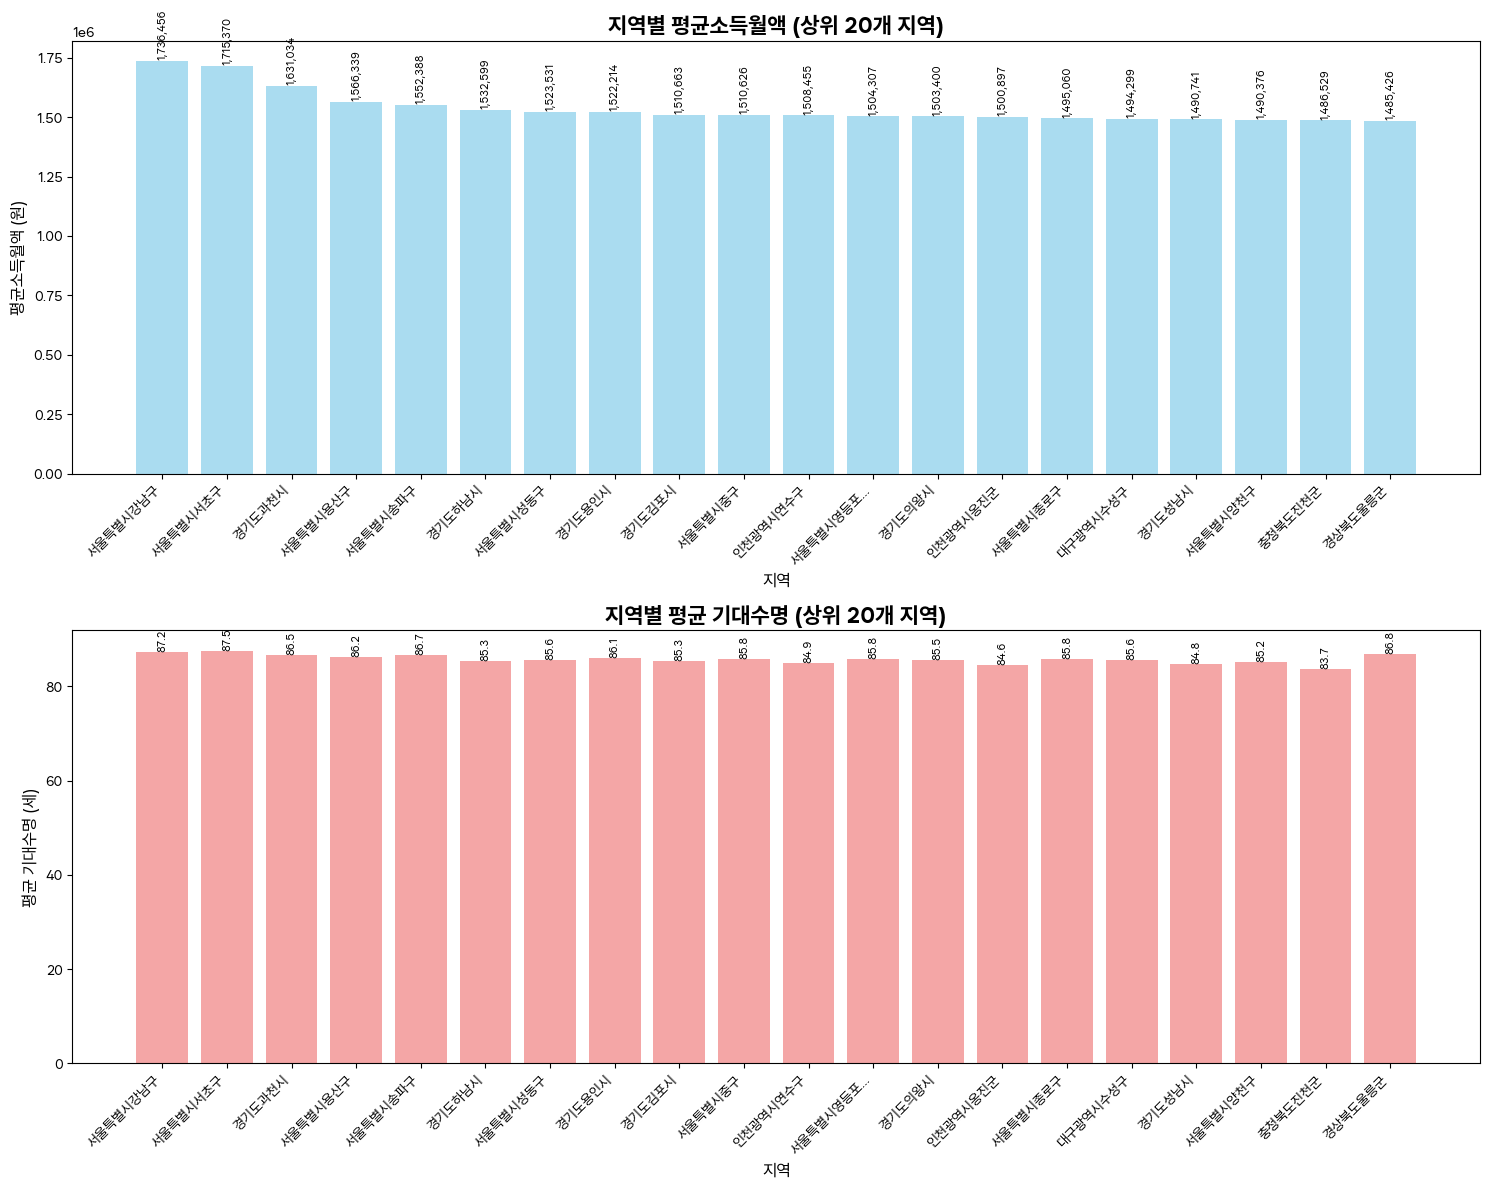

In [388]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Wanted Sans'
plt.rcParams['axes.unicode_minus'] = False

merged_data = pd.merge(average_income, life_expectancy, on='시군구', how='inner')

top_20_regions = merged_data.nlargest(20, '평균소득월액')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

bars1 = ax1.bar(range(len(top_20_regions)), top_20_regions['평균소득월액'], 
                color='skyblue', alpha=0.7, label='평균소득월액')
ax1.set_title('지역별 평균소득월액 (상위 20개 지역)', fontsize=16, fontweight='bold')
ax1.set_ylabel('평균소득월액 (원)', fontsize=12)
ax1.set_xlabel('지역', fontsize=12)
ax1.set_xticks(range(len(top_20_regions)))
ax1.set_xticklabels([region[:8] + '...' if len(region) > 8 else region 
                     for region in top_20_regions['시군구']], rotation=45, ha='right')

for i, v in enumerate(top_20_regions['평균소득월액']):
    ax1.text(i, v + 5000, f'{v:,.0f}', ha='center', va='bottom', fontsize=8, rotation=90)

bars2 = ax2.bar(range(len(top_20_regions)), top_20_regions['평균 기대수명'], 
                color='lightcoral', alpha=0.7, label='평균 기대수명')
ax2.set_title('지역별 평균 기대수명 (상위 20개 지역)', fontsize=16, fontweight='bold')
ax2.set_ylabel('평균 기대수명 (세)', fontsize=12)
ax2.set_xlabel('지역', fontsize=12)
ax2.set_xticks(range(len(top_20_regions)))
ax2.set_xticklabels([region[:8] + '...' if len(region) > 8 else region 
                     for region in top_20_regions['시군구']], rotation=45, ha='right')

for i, v in enumerate(top_20_regions['평균 기대수명']):
    ax2.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()


# 상관관계 분석

이 섹션에서는 평균소득월액과 기대수명 간의 상관관계를 통계적으로 분석합니다.


In [389]:
correlation = merged_data['평균소득월액'].corr(merged_data['평균 기대수명'])

print("=== 상관관계 분석 결과 ===")
print(f"평균소득월액과 기대수명 간 상관계수: {correlation:.4f}")

if abs(correlation) >= 0.7:
    strength = "강한"
elif abs(correlation) >= 0.3:
    strength = "중간"
else:
    strength = "약한"

direction = "양의" if correlation > 0 else "음의"
print(f"상관관계 강도: {strength} {direction} 상관관계")

from scipy import stats
n = len(merged_data)
t_stat = correlation * np.sqrt((n-2)/(1-correlation**2))
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), n-2))

print(f"통계적 유의성: p-value = {p_value:.6f}")
if p_value < 0.001:
    print("결과: 매우 유의함 (p < 0.001)")
elif p_value < 0.01:
    print("결과: 매우 유의함 (p < 0.01)")
elif p_value < 0.05:
    print("결과: 유의함 (p < 0.05)")
else:
    print("결과: 유의하지 않음 (p >= 0.05)")

print(f"\n=== 추가 통계 정보 ===")
print(f"분석 대상 지역 수: {len(merged_data)}개")
print(f"소득 범위: {merged_data['평균소득월액'].min():,.0f}원 ~ {merged_data['평균소득월액'].max():,.0f}원")
print(f"기대수명 범위: {merged_data['평균 기대수명'].min():.2f}세 ~ {merged_data['평균 기대수명'].max():.2f}세")


=== 상관관계 분석 결과 ===
평균소득월액과 기대수명 간 상관계수: 0.7033
상관관계 강도: 강한 양의 상관관계
통계적 유의성: p-value = 0.000000
결과: 매우 유의함 (p < 0.001)

=== 추가 통계 정보 ===
분석 대상 지역 수: 230개
소득 범위: 1,201,207원 ~ 1,736,456원
기대수명 범위: 81.26세 ~ 87.46세


# 상관관계 시각화

이 섹션에서는 분석한 데이터를 다양한 그래프로 시각화하여 직관적으로 이해할 수 있도록 합니다.


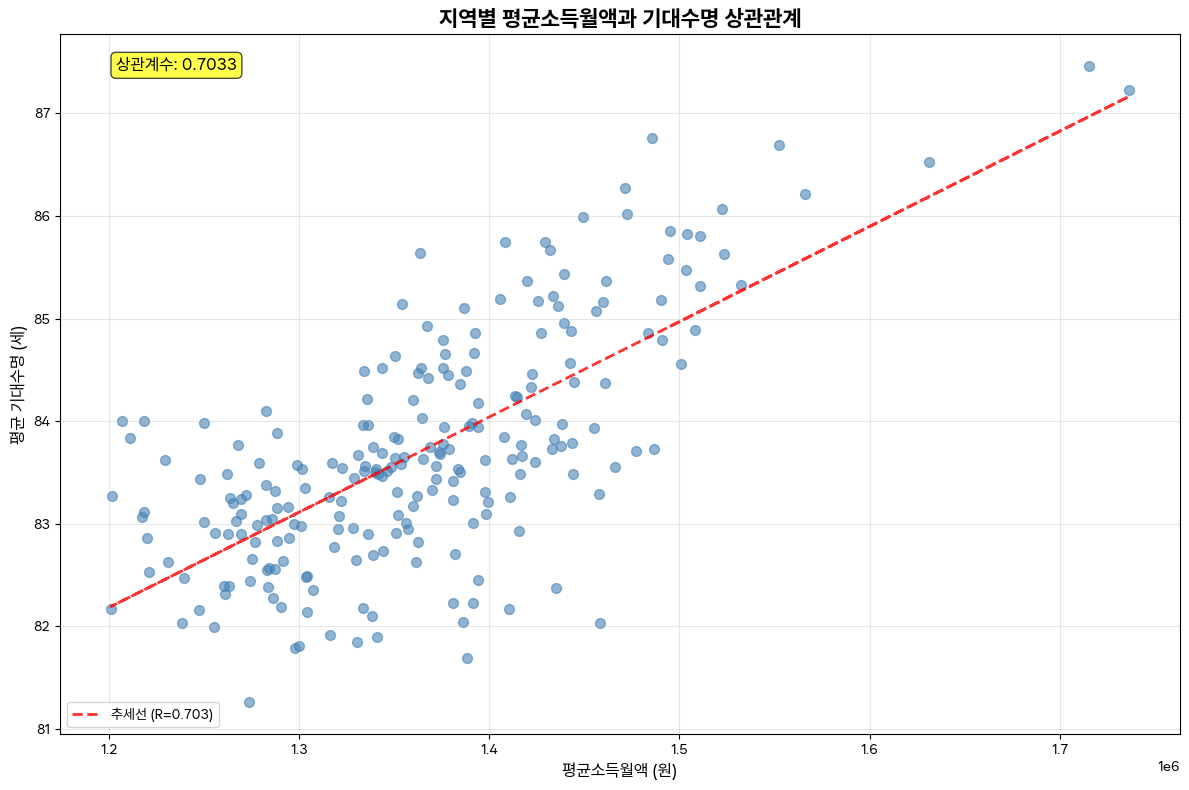

In [390]:
plt.figure(figsize=(12, 8))

plt.scatter(merged_data['평균소득월액'], merged_data['평균 기대수명'], 
           alpha=0.6, s=50, color='steelblue')

z = np.polyfit(merged_data['평균소득월액'], merged_data['평균 기대수명'], 1)
p = np.poly1d(z)
plt.plot(merged_data['평균소득월액'], p(merged_data['평균소득월액']), 
         "r--", alpha=0.8, linewidth=2, label=f'추세선 (R={correlation:.3f})')

plt.xlabel('평균소득월액 (원)', fontsize=12)
plt.ylabel('평균 기대수명 (세)', fontsize=12)
plt.title('지역별 평균소득월액과 기대수명 상관관계', fontsize=16, fontweight='bold')

plt.text(0.05, 0.95, f'상관계수: {correlation:.4f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


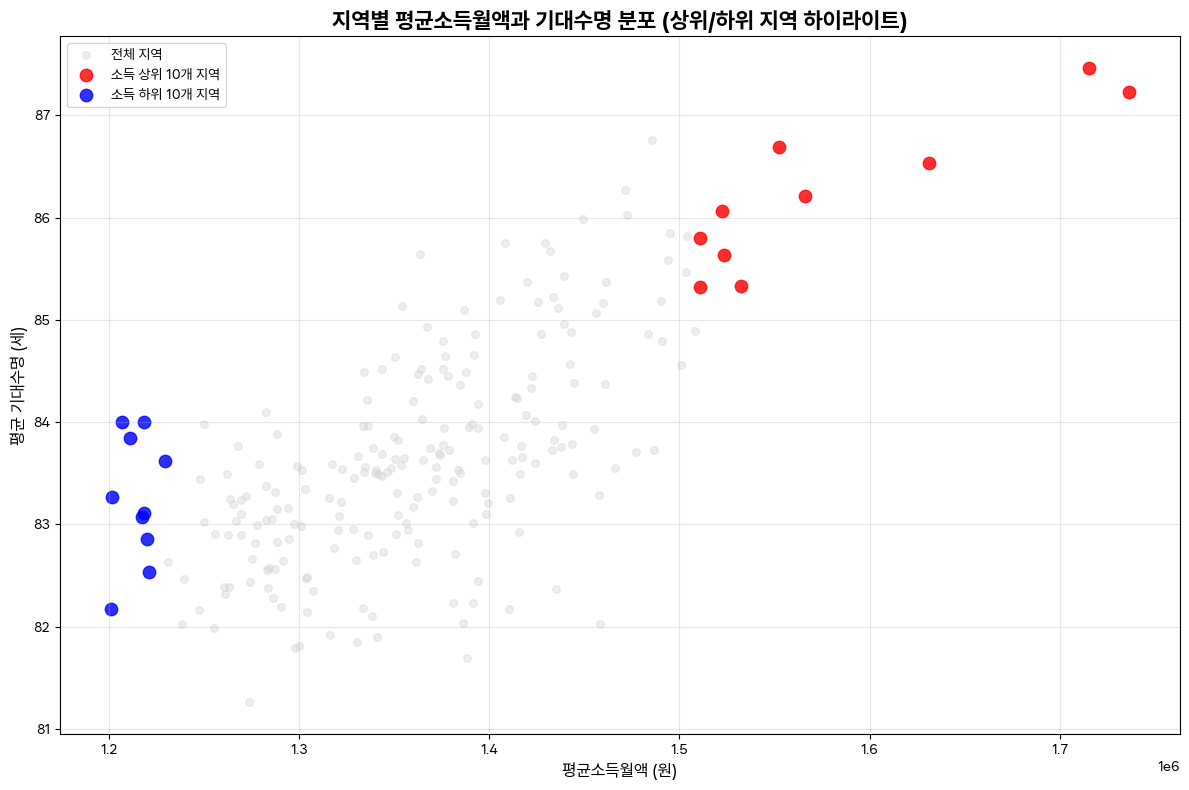

In [391]:
plt.figure(figsize=(12, 8))
plt.scatter(merged_data['평균소득월액'], merged_data['평균 기대수명'], 
           alpha=0.4, s=30, color='lightgray', label='전체 지역')

top_10 = merged_data.nlargest(10, '평균소득월액')
plt.scatter(top_10['평균소득월액'], top_10['평균 기대수명'], 
           alpha=0.8, s=80, color='red', label='소득 상위 10개 지역')

bottom_10 = merged_data.nsmallest(10, '평균소득월액')
plt.scatter(bottom_10['평균소득월액'], bottom_10['평균 기대수명'], 
           alpha=0.8, s=80, color='blue', label='소득 하위 10개 지역')

plt.xlabel('평균소득월액 (원)', fontsize=12)
plt.ylabel('평균 기대수명 (세)', fontsize=12)
plt.title('지역별 평균소득월액과 기대수명 분포 (상위/하위 지역 하이라이트)', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
